<a href="https://colab.research.google.com/github/OmarFarukNoman/Into-to-Machine-Learning/blob/main/Homework-2/Problem_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-68215571.py:33: RuntimeWarning: overflow encountered in square
  train_loss = (1/(2*m)) * np.sum((X_b @ theta - y_out)**2)
/tmp/ipython-input-68215571.py:34: RuntimeWarning: overflow encountered in square
  val_loss = (1/(2*m_val)) * np.sum((X_val_b @ theta - y_val)**2)
/tmp/ipython-input-68215571.py:33: RuntimeWarning: overflow encountered in matmul
  train_loss = (1/(2*m)) * np.sum((X_b @ theta - y_out)**2)
/tmp/ipython-input-68215571.py:34: RuntimeWarning: overflow encountered in matmul
  val_loss = (1/(2*m_val)) * np.sum((X_val_b @ theta - y_val)**2)
/tmp/ipython-input-68215571.py:30: RuntimeWarning: overflow encountered in matmul
  gradients = (1/m) * X_b.T @ (X_b @ theta - y_out)
/tmp/ipython-input-68215571.py:30: RuntimeWarning: invalid value encountered in matmul
  gradients = (1/m) * X_b.T @ (X_b @ theta - y_out)


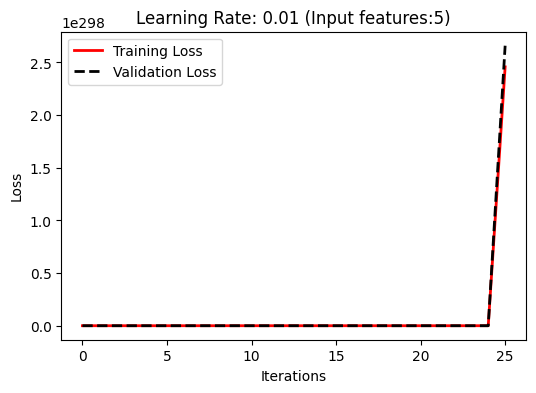

Learning Rate: 0.01
Final Training Loss: nan
Final Validation Loss: nan
Theta values: [nan nan nan nan nan nan]

Best Parameters:
Theta_0: nan
area (theta_1): nan
bedrooms (theta_2): nan
bathrooms (theta_3): nan
stories (theta_4): nan
parking (theta_5): nan


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# For HW2, we're using housing dataset as per instruction.
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
h_data = pd.read_csv(url)

# I've defined i/p and o/p for this problem
X_in = h_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_out = h_data['price'].values.reshape(-1, 1) #It converts the output as a 1D array with m=5 rows

# I've splitted the dataset into traning (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_in, y_out, test_size=0.2, random_state=80)

# Gradient descent
def gradient_descent(X_in, y_out, X_val, y_val, learning_rate, max_iterations):
    m, n = X_in.shape
    X_b = np.c_[np.ones((m, 1)), X_in]

    m_val = X_val.shape[0]
    X_val_b = np.c_[np.ones((m_val, 1)), X_val]

    theta = np.zeros((n + 1, 1))
    train_losses = []
    val_losses = []

    for iteration in range(max_iterations):
        gradients = (1/m) * X_b.T @ (X_b @ theta - y_out)
        theta -= learning_rate * gradients

        train_loss = (1/(2*m)) * np.sum((X_b @ theta - y_out)**2)
        val_loss = (1/(2*m_val)) * np.sum((X_val_b @ theta - y_val)**2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses

learning_rate = 0.01
max_iterations = 1000

theta, train_losses, val_losses = gradient_descent(X_train, y_train, X_val, y_val, learning_rate, max_iterations)

#I've plotted the result
plt.figure(figsize=(6, 4))
plt.plot(train_losses, label='Training Loss', linewidth=2, color='red')
plt.plot(val_losses, label='Validation Loss', linewidth=2, linestyle='--', color='black')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title(f'Learning Rate: {learning_rate} (Input features:5)')
plt.legend()
plt.show()

# Results
print(f"Learning Rate: {learning_rate}")
print(f"Final Training Loss: {train_losses[-1]:.2f}")
print(f"Final Validation Loss: {val_losses[-1]:.2f}")
print(f"Theta values: {theta.flatten()}")

# Best parameters according to my model
print("\nBest Parameters:")
print(f"Theta_0: {theta[0][0]:.2f}")
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for i, feature in enumerate(features):
    print(f"{feature} (theta_{i+1}): {theta[i+1][0]:.2f}")